# XGBoost Training

### Workflow: 
1. Load Train and Test Data
2. Train a XGBoost model and fit the data
3. Provide the evaluation metrics

In [ ]:
# Install relavant libraries
! pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# 1. Load the preprocessed data
train_clean = pd.read_csv("../data/model_ready/train_clean.csv")
test_clean  = pd.read_csv("../data/model_ready/test_clean.csv")

target_col = "status"

X_train = train_clean.drop(columns=[target_col])
y_train = train_clean[target_col]

X_test  = test_clean.drop(columns=[target_col])
y_test  = test_clean[target_col]

NameError: name 'pd' is not defined

In [26]:
# Describe the data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (738, 30)
Testing data shape: (185, 30)


In [11]:
# 2. Define baseilne XGBoost model
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    )

In [12]:
# 3. Train the model
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
# 4. Predict on test set
y_pred = model.predict(X_test)


In [20]:
# 5. Evaulation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print
print("===== Baseline XGBoost Metrics =====")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

===== Baseline XGBoost Metrics =====
Accuracy:  0.7568
Precision: 0.7953
Recall:    0.8417
F1 Score:  0.8178

Confusion Matrix:
[[ 39  26]
 [ 19 101]]


In [24]:
# 6. Output reslts
output_dir = "../docs/tuning_results（XGBoost)"
os.makedirs(output_dir, exist_ok=True)

report_path = os.path.join(output_dir, "xgboost_baseline_report.txt")

with open(report_path, "w") as f:
    f.write("XGBoost Baseline Model Report\n")
    f.write("============================\n\n")
    f.write(f"Accuracy:  {acc:.4f}\n")
    f.write(f"Precision: {prec:.4f}\n")
    f.write(f"Recall:    {rec:.4f}\n")
    f.write(f"F1 Score:  {f1:.4f}\n\n")
    f.write("Confusion Matrix:\n")
    f.write(str(cm))

print(f"Report saved to: {report_path}")

Report saved to: ../docs/tuning_results（XGBoost)\xgboost_baseline_report.txt


Confusion matrix saved to: ../docs/tuning_results（XGBoost)\xgboost_baseline_cm.png


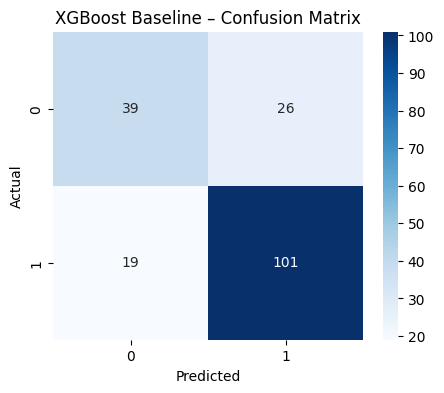

In [25]:
# 7. A plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Baseline – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

cm_path = os.path.join(output_dir, "xgboost_baseline_cm.png")
plt.savefig(cm_path, dpi=300, bbox_inches="tight")

print(f"Confusion matrix saved to: {cm_path}")